In [1]:
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import scipy
import requests
from imdbpie import Imdb
import nltk
import matplotlib.pyplot as plt
import urllib2
from bs4 import BeautifulSoup
import nltk
import collections
import re
import csv

%matplotlib inline

In [21]:
df = pd.read_csv('final.csv')
del df['Unnamed: 0']

In [22]:
df

,MID,UID,value
0,tt0017136,ur0020866,8.0
1,tt0017136,ur0035229,10.0
2,tt0017136,ur0137908,6.0
3,tt0017136,ur0158253,8.0
4,tt0017136,ur0166205,8.0
5,tt0017136,ur0178741,10.0
6,tt0017136,ur0187171,10.0
7,tt0017136,ur0197287,8.0
8,tt0017136,ur0218021,8.0
9,tt0017136,ur0222418,9.0


In [23]:
print "Number of reviews: " + str(len(df))
print "Number of users: " + str(df['UID'].unique().shape[0])
print "Number of movies: " + str(df['MID'].unique().shape[0])

Number of reviews: 95233
Number of users: 2742
Number of movies: 401


In [24]:
# Movie Menu

movie_menu = pd.DataFrame({'MID': df['MID'].unique().tolist(),
                          'Code': np.arange(1,402)})

In [25]:
# User Menu
uid_unique = df['UID'].unique().tolist()
uid_unique_sort = sorted(uid_unique)

user_menu = pd.DataFrame({'UID': uid_unique_sort,
                          'Code': np.arange(1,2743)})

In [26]:
# To create sequence table
user_code = []
for i in df['UID']:
    user_code.append(user_menu['UID'].tolist().index(i)+1)

movie_code = []
for i in df['MID']:
    movie_code.append(movie_menu['MID'].tolist().index(i)+1)

data_seq = pd.DataFrame({'MID': movie_code,
                        "UID": user_code,
                        'STAR': df['value']
                       })

In [27]:
data = data_seq[['UID','MID','STAR']]
data.columns = ['user_id','movie_id','rating']

In [28]:
print "Unique movie: " + str(data['movie_id'].unique().shape[0])
print "Unique user: " + str(data['user_id'].unique().shape[0])
print "length of dataset: " + str(len(data)) 

Unique movie: 401
Unique user: 2742
length of dataset: 95233


In [29]:
#Change star scale from 1-10 to 1-5
rating = []
for i in data["rating"]:
    if i == 10.0:
        rating.append(5)
    if i == 9.0:
        rating.append(4.5)
    if i == 8.0:
        rating.append(4)
    if i == 7.0:
        rating.append(3.5)
    if i == 6.0:
        rating.append(3)
    if i == 5.0:
        rating.append(2.5)
    if i == 4.0:
        rating.append(2)
    if i == 3.0:
        rating.append(1.5)
    if i == 2.0:
        rating.append(1)
    if i == 1.0:
        rating.append(0.5)

In [30]:
data['rating'] = rating
data

,user_id,movie_id,rating
0,6,1,4.0
1,10,1,5.0
2,43,1,3.0
3,53,1,4.0
4,55,1,4.0
5,63,1,5.0
6,69,1,5.0
7,72,1,4.0
8,80,1,4.0
9,82,1,4.5


## RMSE

In [31]:
n_users = data.user_id.unique().shape[0]

n_items = data.movie_id.unique().shape[0]

print 'Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items)

Number of users = 2742 | Number of movies = 401


In [32]:
from sklearn import cross_validation as cv

train_data,test_data = cv.train_test_split(data, test_size = 0.25,random_state = 42)

In [33]:
for line in train_data.itertuples():
    print line
    break

Pandas(Index=5549, user_id=1699, movie_id=29, rating=4.0)


In [34]:
train_data_matrix = np.zeros((n_users,n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [35]:
train_data_matrix.shape

(2742, 401)

In [36]:
test_data_matrix.shape

(2742, 401)

In [37]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric = "cosine")
item_similarity = pairwise_distances(train_data_matrix.T, metric = "cosine")

In [38]:
def predict(rating, similarity, type = 'user'):
    if type == 'user':
        rating = rating.copy()
        rating[rating==0] = np.nan
        mean_user_rating = np.nanmean(rating,axis = 1)# 2742 results. each represents mean of rating for each user
        rating_diff = (rating - mean_user_rating[:,np.newaxis])
        rating_diff = pd.DataFrame(rating_diff).fillna(0).values
        pred = mean_user_rating[:,np.newaxis] + similarity.dot(rating_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':        
        numer = rating.dot(similarity)
        denom = np.where(rating > 0, 1, 0).dot(similarity)
        pred = numer/denom    
    return pred

In [39]:
item_prediction = predict(train_data_matrix, item_similarity, type = 'item')
user_prediction = predict(train_data_matrix, user_similarity, type = 'user')

(array([    996.,    4443.,    9869.,   32712.,   80847.,  188654.,
         269969.,  286689.,  165939.,   59424.]),
 array([ 1.31761283,  1.69236332,  2.06711382,  2.44186432,  2.81661482,
         3.19136532,  3.56611582,  3.94086632,  4.31561682,  4.69036732,
         5.06511781]),
 <a list of 10 Patch objects>)

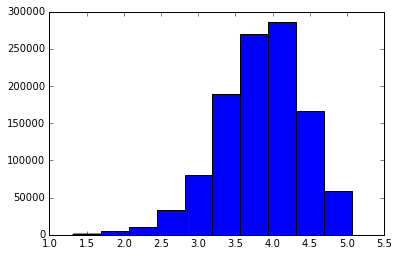

In [40]:
plt.hist(user_prediction.flatten())

In [41]:
from sklearn.metrics import mean_squared_error

from math import sqrt

def rmse(prediction, true_data):

    prediction = prediction[true_data.nonzero()].flatten()
    true_data = true_data[true_data.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, true_data))

In [42]:
print 'User based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix))
print 'Item based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix))

User based CF RMSE: 0.942595114953
Item based CF RMSE: 0.959873368819


In [43]:
### SVD RMSE

import numpy

train_rows, train_cols = train_data_matrix.nonzero()
test_rows, test_cols = test_data_matrix.nonzero()

train_data_matrix = train_data_matrix.copy()
train_data_matrix[train_data_matrix==0] = np.nan
mean_user_rating = np.nanmean(train_data_matrix,axis = 1)# 2742 results. each represents mean of rating for each user
train_data_matrix = (train_data_matrix - mean_user_rating[:,np.newaxis])
train_data_matrix = pd.DataFrame(train_data_matrix).fillna(0).values

test_data_matrix = test_data_matrix.copy()
test_data_matrix[test_data_matrix==0] = np.nan
mean_user_rating = np.nanmean(test_data_matrix,axis = 1)# 2742 results. each represents mean of rating for each user
test_data_matrix = (test_data_matrix - mean_user_rating[:,np.newaxis])
test_data_matrix = pd.DataFrame(test_data_matrix).fillna(0).values

train_scores = train_data_matrix[(train_rows, train_cols)] # array not matrix
test_scores = test_data_matrix[(test_rows, test_cols)] # array not matrix

from math import sqrt 
from sklearn.metrics import mean_squared_error
U, s, Vt = numpy.linalg.svd(train_data_matrix, full_matrices=False)
X_pred = U.dot(numpy.diag(s)).dot(Vt)
print 'Model based RMSE: ' + str(rmse(X_pred, test_data_matrix))

//anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


Model based RMSE: 0.900317662049


In [44]:
## RMSE summary
RMSE = pd.DataFrame({ 'Algorithms':["ItemCF","UserCF","SVD"], 'RMSE':[0.96,0.94,0.90]})
RMSE

,Algorithms,RMSE
0,ItemCF,0.96
1,UserCF,0.94
2,SVD,0.90


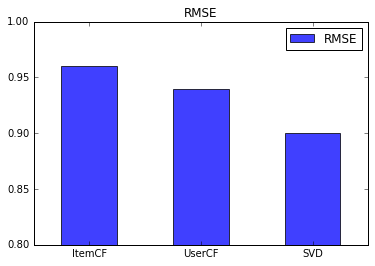

In [45]:
RMSE.set_index(["Algorithms"],inplace=True)
RMSE.plot(kind='bar',alpha=0.75, rot=0)
plt.xlabel("")
plt.title('RMSE')
plt.ylim([0.8,1.0])
plt.show()

## Top_N

In [ ]:
"""
movie_data = pd.concat([movie_data,movie_menu['Code']],axis=1)
del movie_data['movie_imdb_link']

movie_data = movie_data[['Code','movie_title','genres']]
movie_data.columns = ['movie_id','title','genre']
"""

In [51]:
movie_data = pd.read_csv('movie_data.csv')
del movie_data['Unnamed: 0']

In [52]:
movie_data

,movie_id,title,genre
0,1,Metropolis,Drama|Sci-Fi
1,2,It Happened One Night,Comedy|Romance
2,3,Modern Times,Comedy|Drama|Family
3,4,Gone with the Wind,Drama|History|Romance|War
4,5,Mr. Smith Goes to Washington,Comedy|Drama
5,6,The Wizard of Oz,Adventure|Family|Fantasy|Musical
6,7,Rebecca,Drama|Film-Noir|Mystery|Thriller
7,8,Casablanca,Drama|Romance|War
8,9,The Best Years of Our Lives,Drama|Romance|War
9,10,It's a Wonderful Life,Drama|Family|Fantasy|Romance


In [53]:
data

,user_id,movie_id,rating
0,6,1,4.0
1,10,1,5.0
2,43,1,3.0
3,53,1,4.0
4,55,1,4.0
5,63,1,5.0
6,69,1,5.0
7,72,1,4.0
8,80,1,4.0
9,82,1,4.5


### User Based

In [54]:
train = {}
test = {}
for line in train_data.itertuples():
    user = line[1]
    item = line[2]
    score = line[3] 
    train.setdefault(user, {})
    train[user][item] = score

for line in test_data.itertuples():
    user = line[1]
    item = line[2]
    score = line[3] 
    test.setdefault(user, {})
    test[user][item] = score

In [55]:
item_users = dict() # [i: (u1, u99, u65)]
for user,items in train.items(): # 1 {48: 10.0.. 
    for i in items.keys(): 
        if i not in item_users: 
            item_users[i] = set() 
        item_users[i].add(user) 

In [56]:
C = dict()  # common
N = dict()  #eg User1 watched 16 movies
for i,users in item_users.items(): # [1 {57,203......}]
    for u in users:
        N.setdefault(u,0) 
        N[u] += 1
        C.setdefault(u,{})
        for v in users:
            if u == v:
                continue
            C[u].setdefault(v,0)
            C[u][v] += 1

In [57]:
import math
W = dict()      # Similarity
for u,related_users in C.items(): 
    W.setdefault(u,{})
    for v,cuv in related_users.items():
        W[u][v] = cuv / math.sqrt(N[u] * N[v])

In [58]:
def UserCF_Recommend(user,K=5,N=10):
    rank = dict()
    action_item = train[user].keys()     #
    for v,wuv in sorted(W[user].items(),key=lambda x:x[1],reverse=True)[0:K]:
        for i,rvi in train[v].items(): 
            if i in action_item: 
                continue
            rank.setdefault(i,0) 
            rank[i] += wuv * rvi  
    return dict(sorted(rank.items(),key=lambda x:x[1],reverse=True)[0:N])  

In [59]:
def UserCF_PrecisionAndRecall(train,test,K,N):
    hit = 0
    recall = 0
    precision = 0
    for user in train.keys(): 
        tu = test.get(user,{}) 
        rank = UserCF_Recommend(user,K=K,N=N)
        for i,_ in rank.items():
            if i in tu:
                hit += 1
        recall += len(tu)
        precision += N
    recall = hit / (recall * 1.0)
    precision = hit / (precision * 1.0)    
    return (precision,recall)

In [ ]:
k = [5,10,20,40,80,120,160,200]
for i in k:
    print UserCF_PrecisionAndRecall(train,test,K=i,N=5)

In [60]:
## Coverage

def UserCF_Coverage(train, test, K, N):
    recommend_items = set()
    all_items = set()
    for user in train.keys():
        for item in train[user].keys():
            all_items.add(item)
        rank = UserCF_Recommend(user, K=K, N=N)
        for i,_ in rank.items():
            recommend_items.add(i)
    return len(recommend_items) / (len(all_items) * 1.0)

In [ ]:
k = [5,10,20,40,80,120,160,200]
for i in k:
    print UserCF_Coverage(train,test,K=i,N=5)

In [61]:
def UserCF_Popularity(train, test, K, N):
    item_popularity = dict()
    for user, items in train.items():
        for item in items.keys():
            if item not in item_popularity:
                item_popularity[item] = 0
            item_popularity[item] += 1
    ret = 0
    n=0
    for user in train.keys():
        rank = UserCF_Recommend(user, K=K, N=N)
        for item, pui in rank.items():
            ret += math.log(1 + item_popularity[item])
            n += 1
    ret /= n * 1.0
    return ret

In [158]:
k = [5,10,20,40,80,120,160,200]
for i in k:
    print UserCF_Popularity(train,test,K=i,N=5)

5.3694289471
5.42082475716
5.4736247255
5.52241218841
5.5715246088
5.6013332822
5.62195047009
5.63971362491


In [62]:
pr = [(0.15047410649161197, 0.08664790625393759),
(0.17016776075857037, 0.09798815573942626),
(0.19037199124726478, 0.10962241169305725),
(0.20226112326768783, 0.11646856230837078),
(0.21064916119620714, 0.12129866857070856),
(0.2087527352297593, 0.12020664454618002),
(0.21086797957695114, 0.12142467134276955),
(0.2075127644055434, 0.11949262883783443)]

In [63]:
userCF_precision = []
userCF_recall = []

for i in pr:
    userCF_precision.append(i[0])
    userCF_recall.append(i[1])

In [64]:
userCF_coverage = [0.985037406484,
0.950124688279,
0.907730673317,
0.800498753117,
0.715710723192,
0.628428927681,
0.588528678304,
0.563591022444]

In [65]:
userCF_popularity = [5.3694289471,
5.42082475716,
5.4736247255,
5.52241218841,
5.5715246088,
5.6013332822,
5.62195047009,
5.63971362491]

In [67]:
k = [5,10,20,40,80,120,160,200]

In [68]:
userCF_performance = pd.DataFrame({'K':k,'Precision':userCF_precision,'Recall':userCF_recall,'Coverage':userCF_coverage, 'Popularity': userCF_popularity})
userCF_performance = userCF_performance[['K','Precision','Recall','Coverage','Popularity']]
userCF_performance

,K,Precision,Recall,Coverage,Popularity
0,5,0.150474,0.086648,0.985037,5.369429
1,10,0.170168,0.097988,0.950125,5.420825
2,20,0.190372,0.109622,0.907731,5.473625
3,40,0.202261,0.116469,0.800499,5.522412
4,80,0.210649,0.121299,0.715711,5.571525
5,120,0.208753,0.120207,0.628429,5.601333
6,160,0.210868,0.121425,0.588529,5.621950
7,200,0.207513,0.119493,0.563591,5.639714


## Item Based

In [69]:
C = dict()  #item item
N = dict()  #
for user,items in train.items():
    for i in items.keys():
        N.setdefault(i,0)
        N[i] += 1
        C.setdefault(i,{})
        for j in items.keys():
            if i == j : continue
            C[i].setdefault(j,0)
            C[i][j] += 1

In [70]:
W = dict()
for i,related_items in C.items():
    W.setdefault(i,{})
    for j,cij in related_items.items():
        W[i][j] = cij / (math.sqrt(N[i] * N[j]))

In [71]:
def ItemCF_Recommend(user,K=3,N=10):
    rank = dict()
    action_item = train[user]     #item score
    for item,score in action_item.items():
        for j,wj in sorted(W[item].items(),key=lambda x:x[1],reverse=True)[0:K]:
            if j in action_item.keys():
                continue
            rank.setdefault(j,0)
            rank[j] += score * wj
    return dict(sorted(rank.items(),key=lambda x:x[1],reverse=True)[0:N])

In [72]:
ItemCF_Recommend(1,K=3,N=10)

{2: 1.7211570063931536,
 16: 1.5293140175584594,
 29: 1.5468811369307467,
 40: 1.777651379469116,
 69: 1.5393614209913409,
 84: 2.5619180257993825,
 130: 4.6489819833919714,
 132: 3.0783861445150791,
 208: 1.6020897307005297,
 220: 2.5464164213728768}

In [73]:
# Precision and Recall
def ItemCF_PrecisionAndRecall(train,test,K,N):
    hit = 0
    recall = 0
    precision = 0
    for user in train.keys():
        tu = test.get(user,{})
        rank = ItemCF_Recommend(user,K=K,N=N)
        for i,_ in rank.items():
            if i in tu:
                hit += 1
        recall += len(tu)
        precision += N
    recall = hit / (recall * 1.0)
    precision = hit / (precision * 1.0)
    return (precision,recall)

In [74]:
k = [5,10,20,40,80,120,160,200]
for i in k:
    print ItemCF_PrecisionAndRecall(train,test,K=i,N=5)

(0.20291757840991978, 0.11684657062455374)
(0.20692924872355944, 0.11915662144567181)
(0.2036469730123997, 0.11726657986475703)
(0.19350838803792852, 0.11142845142593137)
(0.19562363238512034, 0.1126464782225209)
(0.1913202042304887, 0.11016842370532151)
(0.1897884755652808, 0.10928640430089462)
(0.19350838803792852, 0.11142845142593137)


In [75]:
## Coverage

def ItemCF_Coverage(train, test, K, N):
    recommend_items = set()
    all_items = set()
    for user in train.keys():
        for item in train[user].keys():
            all_items.add(item)
        rank = ItemCF_Recommend(user, K=K, N=N)
        for i,_ in rank.items():
            recommend_items.add(i)
    return len(recommend_items) / (len(all_items) * 1.0)

In [166]:
k = [5,10,20,40,80,120,160,200]
for i in k:
    print ItemCF_Coverage(train,test,K=i,N=5)

0.73566084788
0.718204488778
0.708229426434
0.69825436409
0.683291770574
0.655860349127
0.653366583541
0.648379052369


In [76]:
def ItemCF_Popularity(train, test, K, N):
    item_popularity = dict()
    for user, items in train.items():
        for item in items.keys():
            if item not in item_popularity:
                item_popularity[item] = 0
            item_popularity[item] += 1
    ret = 0
    n=0
    for user in train.keys():
        rank = ItemCF_Recommend(user, K=K, N=N)
        for item, pui in rank.items():
            ret += math.log(1 + item_popularity[item])
            n += 1
    ret /= n * 1.0
    return ret

In [170]:
k = [5,10,20,40,80,120,160,200]
for i in k:
    print ItemCF_Popularity(train,test,K=i,N=5)

5.44508896014
5.46676224909
5.4898857099
5.52071095301
5.56062666203
5.58785058635
5.58812393651
5.58495570199


In [77]:
ipr = [(0.20291757840991978, 0.11684657062455374),
(0.20692924872355944, 0.11915662144567181),
(0.2036469730123997, 0.11726657986475703),
(0.19350838803792852, 0.11142845142593137),
(0.19562363238512034, 0.1126464782225209),
(0.1913202042304887, 0.11016842370532151),
(0.1897884755652808, 0.10928640430089462),
(0.19350838803792852, 0.11142845142593137)]

In [78]:
itemCF_precision = []
itemCF_recall = []

for i in ipr:
    itemCF_precision.append(i[0])
    itemCF_recall.append(i[1])

In [79]:
itemCF_coverage = [0.73566084788,
0.718204488778,
0.708229426434,
0.69825436409,
0.683291770574,
0.655860349127,
0.653366583541,
0.648379052369]

In [80]:
itemCF_popularity = [5.44508896014,
5.46676224909,
5.4898857099,
5.52071095301,
5.56062666203,
5.58785058635,
5.58812393651,
5.58495570199]

In [81]:
itemCF_performance = pd.DataFrame({'K':k,'Precision':itemCF_precision,'Recall':itemCF_recall,'Coverage':itemCF_coverage, 'Popularity': itemCF_popularity})
itemCF_performance = itemCF_performance[['K','Precision','Recall','Coverage','Popularity']]
itemCF_performance

,K,Precision,Recall,Coverage,Popularity
0,5,0.202918,0.116847,0.735661,5.445089
1,10,0.206929,0.119157,0.718204,5.466762
2,20,0.203647,0.117267,0.708229,5.489886
3,40,0.193508,0.111428,0.698254,5.520711
4,80,0.195624,0.112646,0.683292,5.560627
5,120,0.191320,0.110168,0.655860,5.587851
6,160,0.189788,0.109286,0.653367,5.588124
7,200,0.193508,0.111428,0.648379,5.584956


### SVD

In [82]:
data

,user_id,movie_id,rating
0,6,1,4.0
1,10,1,5.0
2,43,1,3.0
3,53,1,4.0
4,55,1,4.0
5,63,1,5.0
6,69,1,5.0
7,72,1,4.0
8,80,1,4.0
9,82,1,4.5


In [83]:
ratings_mat = np.zeros((n_users,n_items))
for line in data.itertuples():
    ratings_mat[line[1]-1, line[2]-1] = line[3]

In [84]:
ratings_mat

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  3. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 4. ,  4.5,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  3. ,  4.5, ...,  0. ,  0. ,  0. ]])

In [85]:
# Normalise
mean_user_rating = np.mean(ratings_mat,axis = 1)
normalised_mat = (ratings_mat - mean_user_rating[:,np.newaxis])

In [86]:
A = normalised_mat / np.sqrt(len(movie_data) - 1)
U, S, V = np.linalg.svd(A)

In [87]:
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

In [91]:
# Helper function to print top N similar movies
def print_similar_movies(movie_data, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    movie_data[movie_data.movie_id == movie_id].title.values[0]))
    for id in top_indexes + 1:
        ##print movie_data[movie_data.movie_id == id].title.values[0] ## print movie names
        print movie_data[movie_data.movie_id == id].movie_id.values[0]

In [90]:
k = 50
movie_id = 1
top_n = 10

sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id , top_n)
print_similar_movies(movie_data, movie_id, indexes)

Recommendations for Metropolis : 

Metropolis 
Seven Samurai 
Modern Times 
Singin' in the Rain 
Rebecca 
It Happened One Night 
Blade Runner 
Gone with the Wind 
The Apartment 
Princess Mononoke 


In [92]:

def SVD_Recommend(user,K=50,N=10):
    rank = dict()
    action_item = train[user] 
    sliced = V.T[:, :k]# representative data
    #top_like = dict(sorted(action_item.items(),key=lambda x:x[1],reverse=True)[0:3])
    for item,score in action_item.items(): 
        indexes = top_cosine_similarity(sliced, item,top_n=3)
        for id in indexes + 1:
            movie = movie_data[movie_data.movie_id == id].movie_id.values[0]
            #print movie
            if movie in action_item.keys():
                continue
            rank.setdefault(movie,0)
            t = data.groupby(['movie_id'])[['rating']].sum()
            rank[movie] += t.iloc[movie-1].values[0]
    return dict(sorted(rank.items(),key=lambda x:x[1],reverse=True)[0:N])

In [93]:
def SVD_PrecisionAndRecall(train,test,K,N):
    hit = 0
    recall = 0
    precision = 0
    for user in train.keys(): 
        rank = SVD_Recommend(user,K=K,N=N)
        tu = test.get(user,{}) 
        for i,_ in rank.items():
            if i in tu:
                hit += 1
        recall += len(tu)
        precision += N
    recall = hit / (recall * 1.0)
    precision = hit / (precision * 1.0)    
    return (precision,recall)

In [158]:
SVD_PrecisionAndRecall(train,test,K=50,N=5)

(0.187819110138585, 0.10815237935234576)

In [159]:
SVD_PrecisionAndRecall(train,test,K=100,N=5)

(0.187819110138585, 0.10815237935234576)

In [160]:
SVD_PrecisionAndRecall(train,test,K=50,N=10)

(0.1526258205689278, 0.17577386702507455)

In [192]:
## SVD_Recommend version2
def SVD_Recommend(user,K=50,N=10):
    rank = dict()
    action_item = train[user] 
    sliced = V.T[:, :k]# representative data
    #top_like = dict(sorted(action_item.items(),key=lambda x:x[1],reverse=True)[0:3])
    for item,score in action_item.items(): 
        indexes = top_cosine_similarity(sliced, item,top_n=10)
        for id in indexes + 1:
            movie = movie_data[movie_data.movie_id == id].movie_id.values[0]
            #print movie
            if movie in action_item.keys():
                continue
            rank.setdefault(movie,0)
            t = data.groupby(['movie_id'])[['rating']].sum()
            rank[movie] += t.iloc[movie-1].values[0]
    return dict(sorted(rank.items(),key=lambda x:x[1],reverse=True)[0:N])




In [193]:
def SVD_PrecisionAndRecall(train,test,K,N):
    hit = 0
    recall = 0
    precision = 0
    for user in train.keys(): 
        rank = SVD_Recommend(user,K=K,N=N)
        tu = test.get(user,{}) 
        for i,_ in rank.items():
            if i in tu:
                hit += 1
        recall += len(tu)
        precision += N
    recall = hit / (recall * 1.0)
    precision = hit / (precision * 1.0)    
    return (precision,recall)

In [163]:
SVD_PrecisionAndRecall(train,test,K=50,N=5)

(0.21057622173595916, 0.12125666764668823)

In [194]:
SVD_PrecisionAndRecall(train,test,K=40,N=5)

(0.21057622173595916, 0.12125666764668823)

In [195]:
## SVD_Recommend version3
def SVD_Recommend(user,K=50,N=10):
    rank = dict()
    action_item = train[user] 
    sliced = V.T[:, :k]# representative data
    #top_like = dict(sorted(action_item.items(),key=lambda x:x[1],reverse=True)[0:3])
    for item,score in action_item.items(): 
        indexes = top_cosine_similarity(sliced, item,top_n=20)
        for id in indexes + 1:
            movie = movie_data[movie_data.movie_id == id].movie_id.values[0]
            #print movie
            if movie in action_item.keys():
                continue
            rank.setdefault(movie,0)
            t = data.groupby(['movie_id'])[['rating']].sum()
            rank[movie] += t.iloc[movie-1].values[0]
    return dict(sorted(rank.items(),key=lambda x:x[1],reverse=True)[0:N])

In [196]:
def SVD_PrecisionAndRecall(train,test,K,N):
    hit = 0
    recall = 0
    precision = 0
    for user in train.keys(): 
        rank = SVD_Recommend(user,K=K,N=N)
        tu = test.get(user,{})
        for i,_ in rank.items():
            if i in tu:
                hit += 1
        recall += len(tu)
        precision += N
    recall = hit / (recall * 1.0)
    precision = hit / (precision * 1.0)    
    return (precision,recall)

In [197]:
SVD_PrecisionAndRecall(train,test,K=50,N=5)

(0.21407731582786288, 0.123272711999664)

In [226]:
## SVD_Recommend version4
def SVD_Recommend(user,K=50,N=10):
    rank = dict()
    action_item = train[user] 
    sliced = V.T[:, :k]# representative data
    #top_like = dict(sorted(action_item.items(),key=lambda x:x[1],reverse=True)[0:3])
    for item,score in action_item.items(): 
        indexes = top_cosine_similarity(sliced, item,top_n=40)
        for id in indexes + 1:
            movie = movie_data[movie_data.movie_id == id].movie_id.values[0]
            #print movie
            if movie in action_item.keys():
                continue
            rank.setdefault(movie,0)
            t = data.groupby(['movie_id'])[['rating']].sum()
            rank[movie] += t.iloc[movie-1].values[0]
    return dict(sorted(rank.items(),key=lambda x:x[1],reverse=True)[0:N])

In [227]:
def SVD_PrecisionAndRecall(train,test,K,N):
    hit = 0
    recall = 0
    precision = 0
    for user in train.keys():
        rank = SVD_Recommend(user,K=K,N=N)
        tu = test.get(user,{}) 
        for i,_ in rank.items():
            if i in tu:
                hit += 1
        recall += len(tu)
        precision += N
    recall = hit / (recall * 1.0)
    precision = hit / (precision * 1.0)    
    return (precision,recall)

In [200]:
SVD_PrecisionAndRecall(train,test,K=50,N=5)

(0.21597374179431073, 0.12436473602419253)

In [214]:
def SVD_Coverage(train, test, K, N):
    recommend_items = set()
    all_items = set()
    for user in train.keys():
        for item in train[user].keys():
            all_items.add(item)
        rank = SVD_Recommend(user, K=K, N=N)
        for i,_ in rank.items():
            recommend_items.add(i)
    return len(recommend_items) / (len(all_items) * 1.0)

In [215]:
SVD_Coverage(train,test,K=50,N=5)

0.8129675810473815

In [228]:
def SVD_Popularity(train, test, K, N):
    item_popularity = dict()
    for user, items in train.items():
        for item in items.keys():
            if item not in item_popularity:
                item_popularity[item] = 0
            item_popularity[item] += 1
    ret = 0
    n=0
    for user in train.keys():
        rank = SVD_Recommend(user, K=K, N=N)
        for item, pui in rank.items():
            ret += math.log(1 + item_popularity[item])
            n += 1
    ret /= n * 1.0
    return ret

In [ ]:
SVD_Popularity(train,test,k=50,N=5)

#5.451847541713383

In [252]:
## SVD_Recommend version5
def SVD_Recommend(user,K=50,N=10):
    rank = dict()
    action_item = train[user] 
    sliced = V.T[:, :k]# representative data
    #top_like = dict(sorted(action_item.items(),key=lambda x:x[1],reverse=True)[0:3])
    for item,score in action_item.items(): 
        indexes = top_cosine_similarity(sliced, item,top_n=60)
        for id in indexes + 1:
            movie = movie_data[movie_data.movie_id == id].movie_id.values[0]
            #print movie
            if movie in action_item.keys():
                continue
            rank.setdefault(movie,0)
            t = data.groupby(['movie_id'])[['rating']].sum()
            rank[movie] += t.iloc[movie-1].values[0]
    return dict(sorted(rank.items(),key=lambda x:x[1],reverse=True)[0:N])

In [253]:
def SVD_PrecisionAndRecall(train,test,K,N):
    hit = 0
    recall = 0
    precision = 0
    for user in train.keys():
        rank = SVD_Recommend(user,K=K,N=N)
        tu = test.get(user,{}) 
        for i,_ in rank.items():
            if i in tu:
                hit += 1
        recall += len(tu)
        precision += N
    recall = hit / (recall * 1.0)
    precision = hit / (precision * 1.0)    
    return (precision,recall)

In [254]:
SVD_PrecisionAndRecall(train,test,K=50,N=5)

(0.21349380014587893, 0.12293670460750136)

In [255]:
def SVD_Coverage(train, test, K, N):
    recommend_items = set()
    all_items = set()
    for user in train.keys():
        for item in train[user].keys():
            all_items.add(item)
        rank = SVD_Recommend(user, K=K, N=N)
        for i,_ in rank.items():
            recommend_items.add(i)
    return len(recommend_items) / (len(all_items) * 1.0)

In [256]:
SVD_Coverage(train,test,K=50,N=5)

0.7231920199501247

In [257]:
def SVD_Popularity(train, test, K, N):
    item_popularity = dict()
    for user, items in train.items():
        for item in items.keys():
            if item not in item_popularity:
                item_popularity[item] = 0
            item_popularity[item] += 1
    ret = 0
    n=0
    for user in train.keys():
        rank = SVD_Recommend(user, K=K, N=N)
        for item, pui in rank.items():
            ret += math.log(1 + item_popularity[item])
            n += 1
    ret /= n * 1.0
    return ret

In [ ]:
SVD_Popularity(train,test,k=50,N=5)
#5.496031943149628

In [ ]:
#version 3
K = 50 N = 5 Top_N = 20
(0.21407731582786288, 0.123272711999664)
Coverage
0.85785536159601

Popularity
5.391093894396017

In [ ]:
#version4
Precision/Recall K = 50 N = 5 Top_N = 40
(0.21597374179431073, 0.12436473602419253)

Coverage
0.8129675810473815
Popularity
5.451847541713383

In [ ]:
#version5
Precision/Recall K = 50 N = 5 Top_N = 60
(0.21349380014587893, 0.12293670460750136)

Coverage
0.7231920199501247

Popularity
5.496031943149628

In [94]:
top_n = [20,40,60]
svd_precision = [0.2141,0.2160,0.2135]
svd_recall = [0.1233,0.1244,0.1229]
svd_coverage = [0.8579, 0.8127, 0.7232]
svd_popularity = [5.3911,5.4518,5.4960]

In [95]:
import pandas as pd
SVD_performance = pd.DataFrame({'K':top_n,'Precision':svd_precision,'Recall':svd_recall, 'Coverage': svd_coverage, 'Popularity': svd_popularity})
SVD_performance = SVD_performance[['K','Precision','Recall','Coverage','Popularity']]
SVD_performance

,K,Precision,Recall,Coverage,Popularity
0,20,0.2141,0.1233,0.8579,5.3911
1,40,0.2160,0.1244,0.8127,5.4518
2,60,0.2135,0.1229,0.7232,5.4960
